In [5]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
reviews=pd.read_csv("/home/saumitra/Desktop/kaggle/winemag-data_first150k.csv",index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


**Counting Plot**

the pandas bar chart becomes a seaborn countplot. 
Comparing this chart with the bar chart from two notebooks ago, we find that, unlike pandas, seaborn doesn't 
require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us!

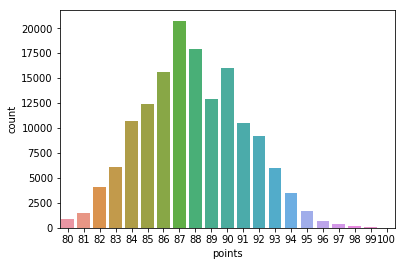

In [2]:
sns.countplot(reviews['points'])

**KDE plot**

seaborn doesn't have a direct analogue to the line or area chart. Instead, the package provides a kdeplot:

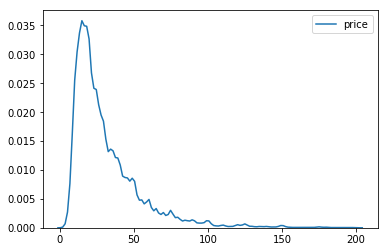

In [3]:
sns.kdeplot(reviews.query('price < 200').price)

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an 
important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would 
cause a line chart to suddenly dip.

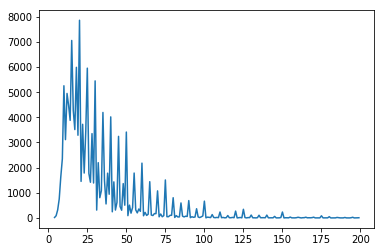

In [5]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always 
using it instead of a line chart for such data.

However, it's a worse choice for ordinal categorical data. A KDE plot expects that if there are 200 wine rated 85 
and 400 rated 86, then the values in between, like 85.5, should smooth out to somewhere in between (say, 300). 
However, if the value in between can't occur (wine ratings of 85.5 are not allowed), then the KDE plot is fitting 
to something that doesn't exist. In these cases, use a line chart instead.

Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data 
overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually 
appealing. However, note that bivariate KDE plots are very **computationally intensive**. We took a sample of 5000 
points in this example to keep compute time reasonable.

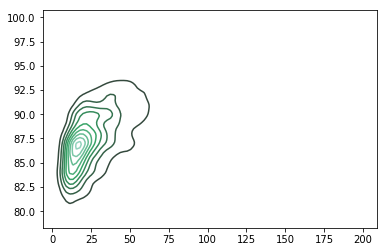

In [6]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:,['price', 'points']].dropna().sample(5000))

**Distplot**

The seaborn equivalent to a pandas histogram is the distplot.

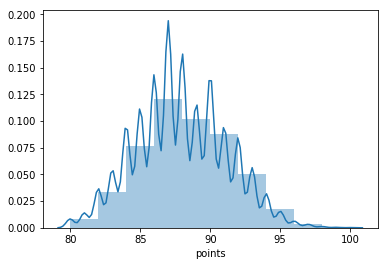

In [7]:
sns.distplot(reviews['points'],bins=10)

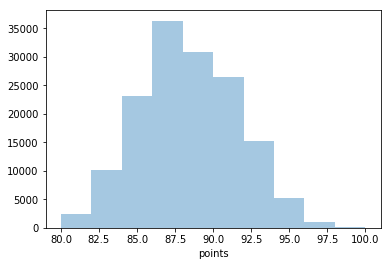

In [8]:
sns.distplot(reviews['points'],bins=10,kde=False)

**Jointplot via scatterplot**

To plot two variables against one another in seaborn, we use jointplot.
Notice that this plot comes with some bells and whistles: a correlation coefficient is provided, along with 
histograms on the sides. These kinds of composite plots are a recurring theme in seaborn. Other than that, the 
jointplot is just like the pandas scatter plot.

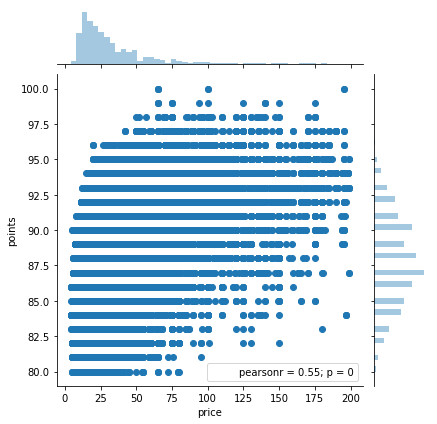

In [9]:
sns.jointplot(x='price',y='points',data=reviews[reviews['price'] < 200])

**Jointplot via hexplot**

As in pandas, we can use a hex plot (by simply passing kind='hex') to deal with overplotting.

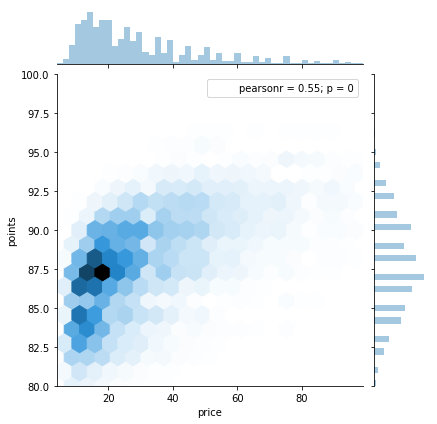

In [10]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex',gridsize=20)

**Boxplot**

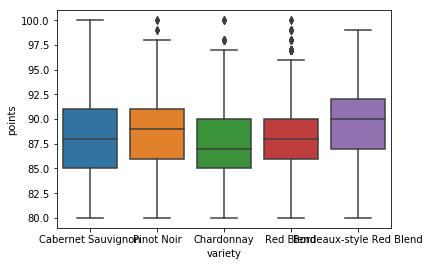

In [11]:
df=reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
sns.boxplot(x='variety',y='points',data=df)

**Violinplot**

A violinplot cleverly replaces the box in the boxplot with a kernel density estimate for the data. It shows 
basically the same data, but is harder to misinterpret and much prettier than the utilitarian boxplot.

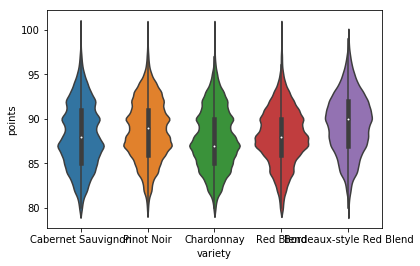

In [12]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

In [13]:
pokemon=pd.read_csv('/home/saumitra/Desktop/kaggle/pokemon.csv')
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [15]:
pokemon.generation.value_counts()

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

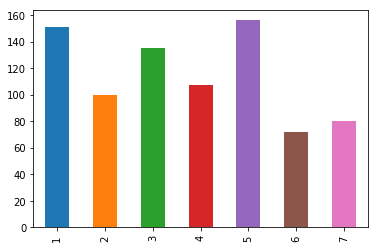

In [16]:
pokemon['generation'].value_counts().sort_index().plot.bar()

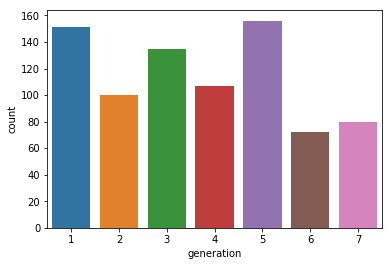

In [17]:
sns.countplot(pokemon['generation'])

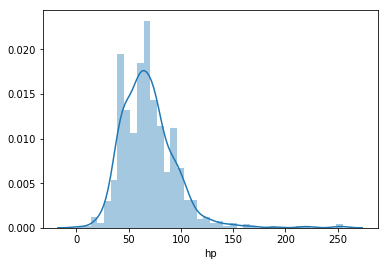

In [18]:
sns.distplot(pokemon['hp'])

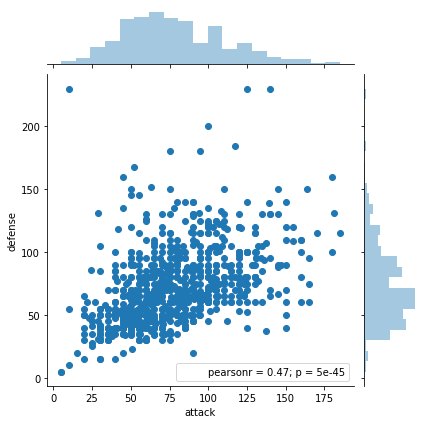

In [19]:
sns.jointplot(x='attack',y='defense',data=pokemon)

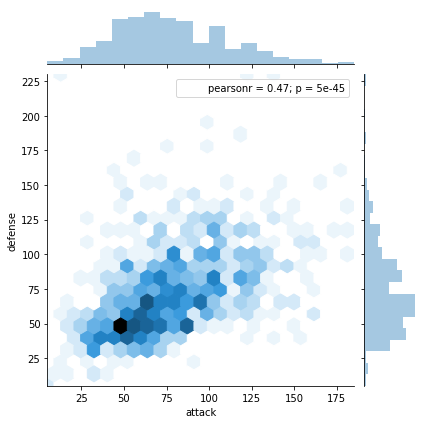

In [20]:
sns.jointplot(x='attack',y='defense',data=pokemon,kind='hex')

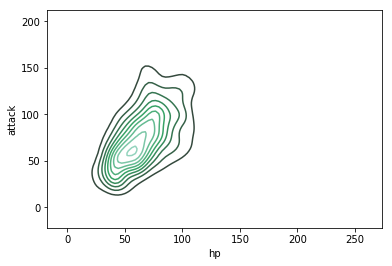

In [21]:
sns.kdeplot(pokemon['hp'],pokemon['attack'])

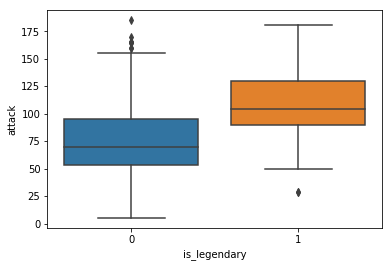

In [22]:
sns.boxplot(x='is_legendary',y='attack',data=pokemon)

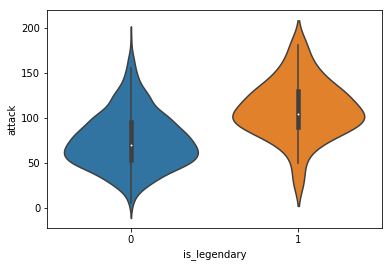

In [23]:
sns.violinplot(x='is_legendary',y='attack',data=pokemon)